In [1]:
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append('./eval-algos/S7/models/')

from utils.allocator import AllocationConfig, allocate_with_constraints

In [2]:
## Onchain Builders

In [3]:
from onchain_builders import OnchainBuildersCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/onchain_builders_testing.yaml')
df_data = load_data(ds)

alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
sim_cfg.metric_variants.update({'Adoption': 1.0, 'Growth': 0, 'Retention': 0})
calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

scores = analysis['final_results']['weighted_score']
scores.head(15)

project_id                                    project_name       display_name      
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=  uniswap            Uniswap               0.151791
2rDMrpL2LxAp8HdLsctM08faEhDFO6b_OJT0yXJhV9I=  aerodrome-finance  Aerodrome Finance     0.132189
9fdHUXUwgPfemopW3xPuCoLOk5tw7-KQXFgv8HVYtUI=  virtual-protocol   Virtuals Protocol     0.100445
PZA75rAKiN4P9poFNpkZYK-yrF1r3WgpEHmbvwPjbXk=  zora               Zora                  0.036450
NXrQCspmyubeAyhKPHl5gz8K7zkYOq7G3cSCPP5e31s=  layer3xyz          Layer3                0.035381
w7zsvZGUnkAgUKialQdqZQdKNtHmkaHWxBbfKy8Id98=  reservoirprotocol  Reservoir Protocol    0.034263
I1ULrUY9t789vj4akEP3lLgB9hmC1Unfg7875NEdWL0=  lifinance          LI.FI                 0.026413
HW-DsDcsApBwqtMlSu8S7BpNvtLdq5jvBrJD7kxz7pM=  safe-global        Safe                  0.022043
LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=  metamask           Metamask              0.021982
o7Tegl37mRn3t51qS50mf-ENGA98ACIQV01Ae_NWWf0=  0xproj

<Axes: >

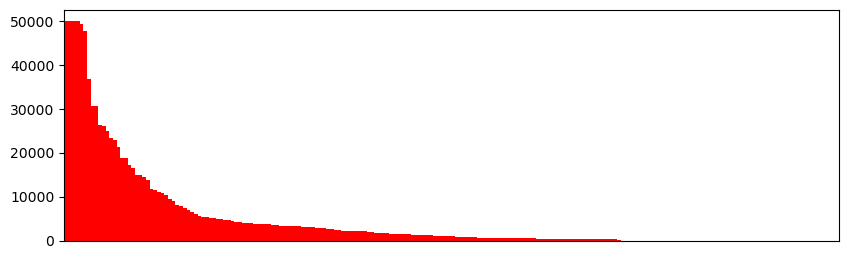

In [4]:
rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

In [5]:
## Devtooling

In [6]:
from devtooling_openrank import DevtoolingCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/devtooling_openrank_testing.yaml')
data = load_data(ds)

sim_cfg.time_decay.update(
    {
        'event_to_devtooling_repo': 0.5,
        'commit_to_onchain_repo': 0.5
    }
)
calculator = DevtoolingCalculator(sim_cfg)
analysis = calculator.run_analysis(*data)

scores = (
    analysis['devtooling_project_results']
    .set_index(['project_name','display_name'])
    ['v_aggregated']
    .sort_values(ascending=False)
)
scores = scores[scores>0]
scores.head(15)

INFO:root:eigentrust compute took 1.1703464579768479 secs 


project_name             display_name        
wevm                     wevm                    0.094153
defi-llama               DefiLlama               0.061770
foundry                  Foundry                 0.059582
optimism                 Optimism                0.057236
ethers-io                ethers.js               0.054473
openzeppelin             OpenZeppelin            0.052387
rainbow                  Rainbow                 0.033035
hardhat-nomicfoundation  Hardhat                 0.027555
snapshot-labs            Snapshot                0.027075
ethereum-cat-herders     Ethereum Cat Herders    0.025249
ethereumjs               EthereumJS              0.021994
sushi                    Sushi                   0.020953
solidity-ethereum        Solidity                0.018858
buidlguidl               Buidl Guidl             0.017807
go-ethereum              geth                    0.016590
Name: v_aggregated, dtype: float64

<Axes: >

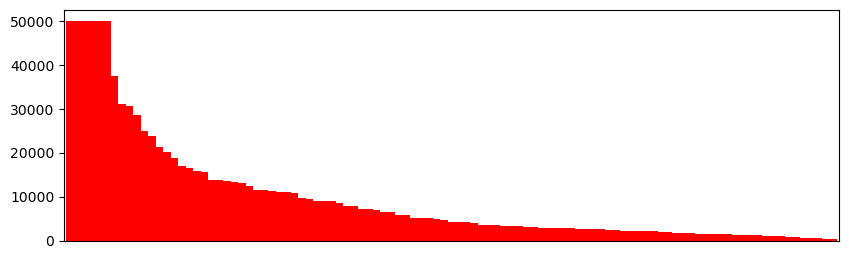

In [7]:
rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))